# Advanced Data Science &amp; Python for Finance  <br><br> Introduction to Backtesting & Intrinio API

-----

FIN580-59305

Jose Luis Rodriguez

Director of Margolis Market Information Lab at University of Illinois at Urbana-Champaign.

* linkedin.com/in/jlroo
* github.com/jlroo

-----

* [Common Financial Analyses](#commonanalyses)
    - Ordinary Least-Squares Regression (OLS)
* [Building A Trading Strategy](#tradingstrategy)
* [Backtesting A Strategy](#backtesting)
* [Evaluating The Trading Strategy](#evaluating)
    - Sharpe Ratio
    - Maximum Drawdown
    - Compound Annual Growth Rate
    

## Packages and Settings

First make sure that the API credentials are stored in a secure file to minimize exposure. We will use the package ``configparses`` to reach the credentials.

**Configuration**

In [1]:
import intrinio_sdk
import configparser as cp

**Scientific Analysis**

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import cufflinks as cf 
import matplotlib.pyplot as plt
cf.set_config_file(offline=True)

**Secure method to load API credentials**

In [3]:
cfg = cp.ConfigParser()
cfg.read('../resources/credentials.cfg')

['../resources/credentials.cfg']

**Connect to Intrinio API using your sandbox API key**

In [4]:
API_KEY = cfg['intrinio']['app_key']

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = API_KEY

security_api = intrinio_sdk.SecurityApi()

**Intrinio API Request**

In [5]:
# str | A Security identifier (Ticker, FIGI, ISIN, CUSIP, Intrinio ID)
identifier = 'UBER' 

# date | Return prices on or after the date (optional)
start_date = '2019-10-01' 

# date | Return prices on or before the date (optional)
end_date = '2020-04-01' 

# str | Return stock prices in the given frequency (optional) (default to daily)
frequency = 'daily' 

# int | The number of results to return (optional) (default to 100)
page_size = 100 

# str | Gets the next page of data from a previous API call (optional)
next_page = ''

In [6]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date)

In [7]:
response.stock_prices[-1]

{'adj_close': 27.38,
 'adj_high': 27.42,
 'adj_low': 26.45,
 'adj_open': 26.8,
 'adj_volume': 65949472.0,
 'close': 27.38,
 'date': datetime.date(2019, 11, 7),
 'frequency': 'daily',
 'high': 27.42,
 'intraperiod': False,
 'low': 26.45,
 'open': 26.8,
 'volume': 65949472.0}

**Note that Intrinio APi returns something that looks like a dictionary but it is a different data type**

In [8]:
type(response.stock_prices[-1])

intrinio_sdk.models.stock_price_summary.StockPriceSummary

In [9]:
response = [p.to_dict() for p in response.stock_prices]

In [10]:
uber_df = pd.DataFrame.from_dict(response)
uber_df['secid'] = "UBER"
uber_df.index = pd.DatetimeIndex(uber_df['date'])
uber_df = uber_df.drop('date',axis=1)
uber_df = uber_df.sort_index()
uber_df.shape

(100, 13)

In [11]:
uber_df.head()

,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,secid
date,,,,,,,,,,,,,
2019-11-07,False,daily,26.80,27.42,26.450,27.38,65949472.0,26.80,27.42,26.450,27.38,65949472.0,UBER
2019-11-08,False,daily,27.48,27.62,26.915,27.01,45263118.0,27.48,27.62,26.915,27.01,45263118.0,UBER
2019-11-11,False,daily,27.03,27.21,26.230,27.14,41445732.0,27.03,27.21,26.230,27.14,41445732.0,UBER
2019-11-12,False,daily,27.38,27.66,26.660,26.70,37095389.0,27.38,27.66,26.660,26.70,37095389.0,UBER
2019-11-13,False,daily,26.47,26.82,26.140,26.71,34512663.0,26.47,26.82,26.140,26.71,34512663.0,UBER


In [12]:
# str | A Security identifier (Ticker, FIGI, ISIN, CUSIP, Intrinio ID)
identifier = 'LYFT' 

# date | Return prices on or after the date (optional)
start_date = '2019-10-01' 

# date | Return prices on or before the date (optional)
end_date = '2020-04-01' 

# str | Return stock prices in the given frequency (optional) (default to daily)
frequency = 'daily' 

# int | The number of results to return (optional) (default to 100)
page_size = 100 

# str | Gets the next page of data from a previous API call (optional)
next_page = ''

In [13]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date)

In [14]:
response = [p.to_dict() for p in response.stock_prices]

In [15]:
lyft_df = pd.DataFrame.from_dict(response)
lyft_df['secid'] = "LYFT"
lyft_df.index = pd.DatetimeIndex(lyft_df['date'])
lyft_df = lyft_df.drop('date',axis=1)
lyft_df = lyft_df.sort_index()
lyft_df.shape

(100, 13)

In [16]:
lyft_df.head()

,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,secid
date,,,,,,,,,,,,,
2019-11-07,False,daily,43.31,43.64,42.27,43.29,6052308.0,43.31,43.64,42.27,43.29,6052308.0,LYFT
2019-11-08,False,daily,43.23,43.38,42.53,43.23,4927352.0,43.23,43.38,42.53,43.23,4927352.0,LYFT
2019-11-11,False,daily,42.85,43.01,41.80,42.97,3843314.0,42.85,43.01,41.80,42.97,3843314.0,LYFT
2019-11-12,False,daily,42.74,43.45,42.20,42.33,4293350.0,42.74,43.45,42.20,42.33,4293350.0,LYFT
2019-11-13,False,daily,42.20,43.43,42.01,43.30,4028280.0,42.20,43.43,42.01,43.30,4028280.0,LYFT


**Merge the two stocks datasets**

In [17]:
rides_share = pd.concat([uber_df,lyft_df])
rides_share.shape

(200, 13)

In [18]:
rides_share.head()

,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,secid
date,,,,,,,,,,,,,
2019-11-07,False,daily,26.80,27.42,26.450,27.38,65949472.0,26.80,27.42,26.450,27.38,65949472.0,UBER
2019-11-08,False,daily,27.48,27.62,26.915,27.01,45263118.0,27.48,27.62,26.915,27.01,45263118.0,UBER
2019-11-11,False,daily,27.03,27.21,26.230,27.14,41445732.0,27.03,27.21,26.230,27.14,41445732.0,UBER
2019-11-12,False,daily,27.38,27.66,26.660,26.70,37095389.0,27.38,27.66,26.660,26.70,37095389.0,UBER
2019-11-13,False,daily,26.47,26.82,26.140,26.71,34512663.0,26.47,26.82,26.140,26.71,34512663.0,UBER


<a id='commonanalyses'></a>
## Common Financial Analyses

**Calculate Returns**

In [20]:
returns = np.log(rides_share['adj_close'] / rides_share['adj_close'].shift(1))
rides_share['returns'] = returns

In [21]:
#LYFT returns 
lyft_returns = rides_share[rides_share['secid'] == 'LYFT']['returns']

In [22]:
#UBER returns
uber_returns = rides_share[rides_share['secid'] == 'UBER']['returns']

### Ordinary Least-Squares Regression (OLS)

**New DataFrame to hold the two stocks returns and calculate the regression**

In [23]:
return_data = pd.concat([uber_returns, lyft_returns], axis=1)[1:]
return_data.columns = ['UBER', 'LYFT']

** OLS Regression **

In [24]:
# Add a constant 
X = sm.add_constant(return_data['UBER'])

# Construct the model
model = sm.OLS(return_data['LYFT'], X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   LYFT   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     268.8
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           1.03e-29
Time:                        15:07:37   Log-Likelihood:                 204.35
No. Observations:                  99   AIC:                            -404.7
Df Residuals:                      97   BIC:                            -399.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0055      0.003     -1.767      0.0

**Ride share companies 100 day stock returns**

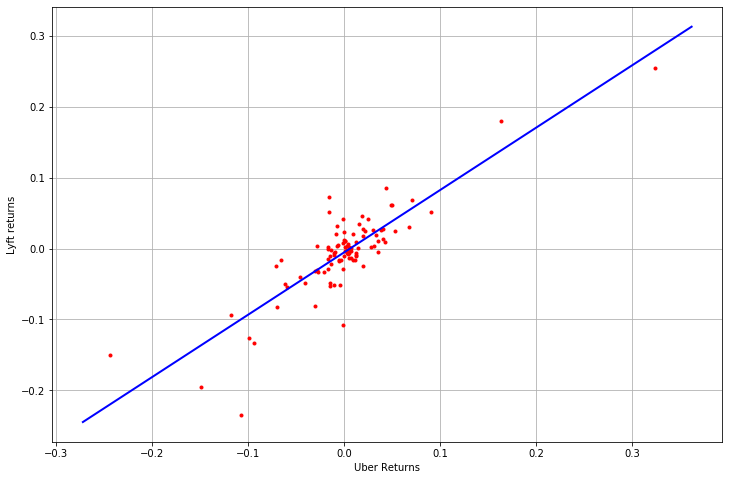

In [25]:
plt.figure(figsize=(12,8))
plt.plot(return_data['UBER'], return_data['LYFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Uber Returns')
plt.ylabel('Lyft returns')

plt.show()

**Ride Share Companies stock 30 day windows correlation**

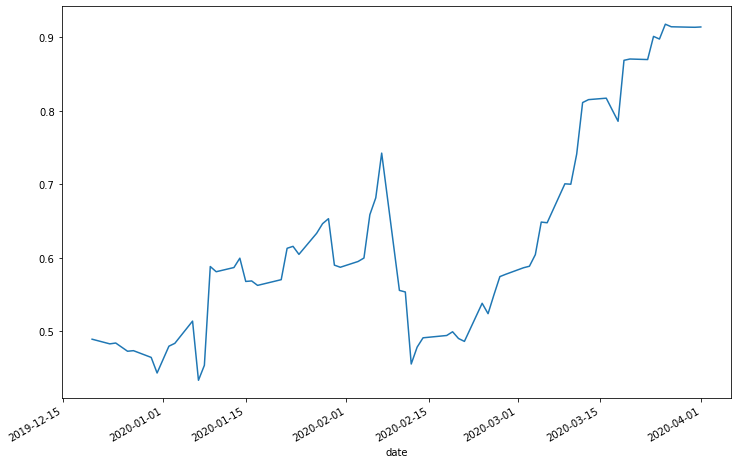

In [26]:
plt.figure(figsize=(12,8))
return_data['LYFT'].rolling(window=30).corr(return_data['UBER']).plot()
plt.show()

<a id='tradingstrategy'></a>
## Trading Strategy 

For this exercise we will use only one stock 

**Established short and long windows parameters based on the number of observations**

In [27]:
short_window = 3
long_window = 10

**Empty `signals` DataFrame with a `signal` column starting at zero**

In [28]:
signals = pd.DataFrame(index = uber_df.index)
signals['signal'] = 0.0

**Simple moving average over the short window**

In [29]:
signals['short_mavg'] = uber_df['close'].rolling(window = short_window,
                                                 min_periods = 1,
                                                 center = False).mean()

**Simple moving average over the long window**

In [30]:
signals['long_mavg'] = uber_df['close'].rolling(window = long_window,
                                                min_periods = 1,
                                                center = False).mean()

**Determine Trading signal**

In [31]:
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:],
                                            1.0, 0.0)

**Create Trading Orders**

In [32]:
signals['positions'] = signals['signal'].diff()
signals['positions'][0] = 1

**Trading strategy and signals for a 3 day short and 10 long strategy**

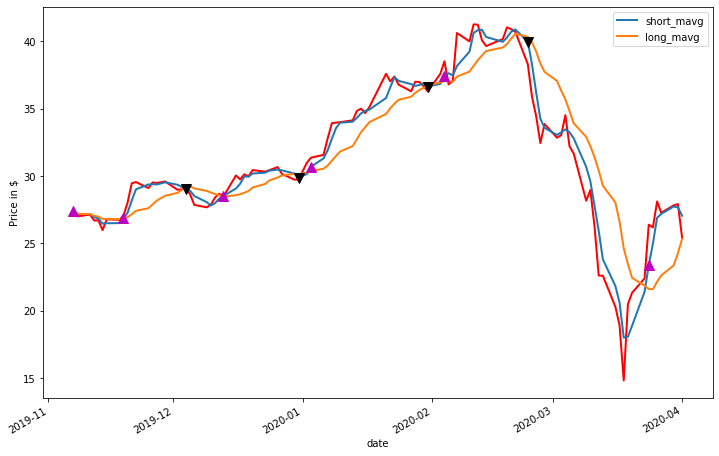

In [33]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
uber_df['close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting 


**Determine the initial capital to invest**

In [34]:
initial_capital= float(10000.0)

**Empty dataFrame to hold the positions**

In [35]:
positions = pd.DataFrame(index = signals.index).fillna(0.0)

**Make a Buy order of 500 shares**

In [36]:
positions['UBER'] = 500 * signals['signal']

**Initialize portfolio with value owned**

In [37]:
portfolio = pd.DataFrame(index = positions.index).fillna(0.0)

**Keep track of the owned shares**

In [38]:
pos_diff = positions.diff()

**Add `holdings` to portfolio**

In [39]:
portfolio['holdings'] = positions.multiply(uber_df['adj_close'], axis=0)

**Calculate remainder `cash` on portfolio**

In [40]:
portfolio['cash'] = initial_capital - (pos_diff.multiply(uber_df['adj_close'], 
                                                         axis=0)).sum(axis=1).cumsum()   

**Create a `total` portfolio value column**

In [41]:
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

**Create a portfolio `returns` column**

In [42]:
portfolio['returns'] = portfolio['total'].pct_change()

In [43]:
portfolio['signal'] = [ 'short' if i == 0 else 'long' for i in signals['signal']]

In [44]:
portfolio

,holdings,cash,total,returns,signal
date,,,,,
2019-11-07,0.0,10000.0,10000.0,NaN,short
2019-11-08,0.0,10000.0,10000.0,0.000000,short
2019-11-11,0.0,10000.0,10000.0,0.000000,short
2019-11-12,0.0,10000.0,10000.0,0.000000,short
2019-11-13,0.0,10000.0,10000.0,0.000000,short
...,...,...,...,...,...
2020-03-26,14060.0,785.0,14845.0,0.069524,long
2020-03-27,13640.0,785.0,14425.0,-0.028292,long
2020-03-30,13915.0,785.0,14700.0,0.019064,long


**Strategy and signals for a 3 day short and 10 long Portfolio**

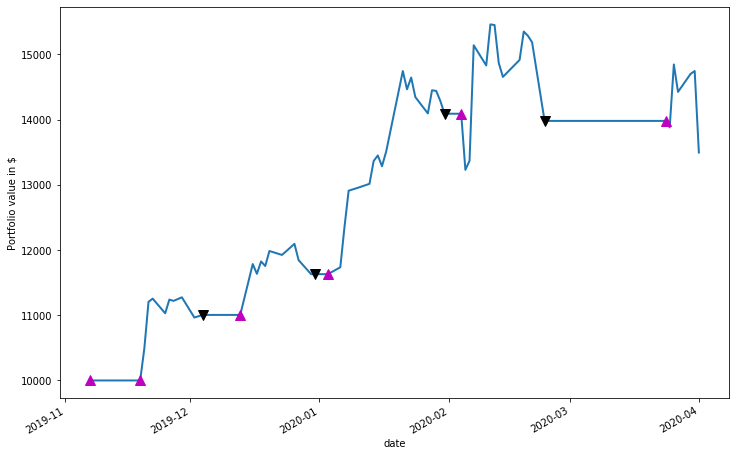

In [45]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating The Trading Strategy

### Sharpe Ratio

In [46]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# 100 Days Sharpe ratio
sharpe_ratio = np.sqrt(100) * (returns.mean() / returns.std())

# annualized Sharpe ratio
# sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

print(sharpe_ratio)

1.2185662560728119


**For 100 Trading days - Sharpe Ratio of 1.25-1.75.**

**Portfolio Sharpe Ratio: 1.3611338090378045**

The level of manager sophistication goes up exponentially from here. Using volatility targeting (also sometimes called intertemporal risk parity) plus all of the above can move your Sharpe ratio above 1.25. Some observers have attributed most hedge fund alpha to this risk management phenomenon. Additionally, using momentum in fixed income and equities boosts returns quite nicely. At this point, leverage is required to realize returns greater than equal to equities.

**For 252 Trading days - Sharpe Ratio of 1.75-2.25.**

**Portfolio Sharpe Ratio: 2.160732935877667**

You need a manager who is competent at investing with all of the above techniques, plus futures, mortgage-backed securities, asset-backed securities, interest rate swaps, credit default swaps, and short selling of cash and debt instruments (via the repurchase market) to finance long positions. 

This is primarily hedge fund stuff. If you're considering investing in these types of strategies, you should try to get a handle on exactly what risks you or your manager is taking and whether the high Sharpe ratio is due to good risk management or due to taking risks that realize infrequently. 

One benefit of running high Sharpe ratio strategies is it's a lot easier to tell whether your strategies are working or not. If you're losing money, it's usually because your model is wrong, not because you're unlucky. This simplifies your decision making.

https://seekingalpha.com/article/4239442-your-sharpe-ratio-is-low-for-reasons-bad-golf

### Maximum Drawdown

A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp

In [47]:
# Define a trailing 12 trading day window
max_window = 12

In [48]:
# Calculate the max drawdown in the past window days for each day
rolling_max = uber_df['adj_close'].rolling(max_window, min_periods=1).max()
daily_drawdown = uber_df['adj_close']/rolling_max - 1.0

In [49]:
# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(max_window, min_periods=1).min()

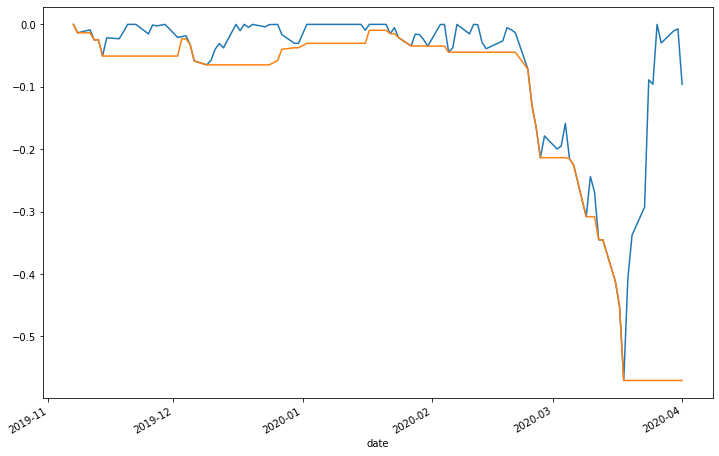

In [50]:
fig = plt.figure(figsize=(12,8))

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

**What CAGR Can Tell You**

The compound annual growth rate isn't a true return rate, but rather a representational figure. It is essentially a number that describes the rate at which an investment would have grown if it had grown the same rate every year and the profits were reinvested at the end of each year. 

https://www.investopedia.com/terms/c/cagr.asp

**Calculate the CAGR**

In [ ]:
days = (uber_df.index[-1] - uber_df.index[0]).days

cagr = ((((uber_df['adj_close'][-1]) / uber_df['adj_close'][1])) ** (365.0/days)) - 1

print(cagr)